한글 설정

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (4,466 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120899 files and dire

# 기본 설정

구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import os
os.chdir('/content/drive/MyDrive/dacon')

라이브러리 불러오기

In [ ]:
!pip install folium

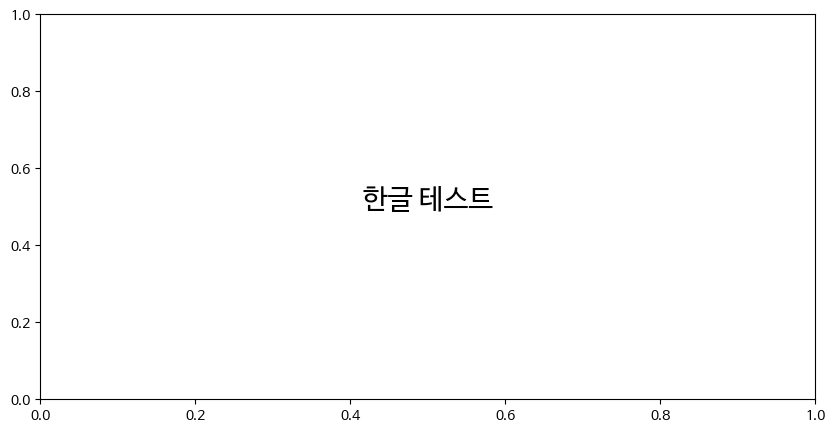

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

import geopandas as gpd
from shapely.geometry import Point, MultiPolygon
from pyproj import Transformer

# 컬럼 생략 없음
pd.set_option('display.max_columns', None)

# 컬러 팔레트
sns.set_palette("deep")
palette = sns.color_palette("deep")

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 경고 제거
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = font_prop.get_name()

# 경고 테스트
plt.figure(figsize=(10, 5))
plt.text(0.5, 0.5, '한글 테스트', fontproperties=font_prop, size=20, ha='center')
plt.show()

# 데이터 불러오기

## 택시 승하차

In [ ]:
# Geopackage 파일 열기
taxi_end = gpd.read_file("./data/대구 빅데이터 마트 데이터/5. 통행/1. 택시 승하차(TIMS)/taxi_end/taxi_end_100.gpkg")
# taxi_end_300 = gpd.read_file("./data/대구 빅데이터 마트 데이터/5. 통행/1. 택시 승하차(TIMS)/taxi_end/taxi_end_300.gpkg")
# taxi_end_500 = gpd.read_file("./data/대구 빅데이터 마트 데이터/5. 통행/1. 택시 승하차(TIMS)/taxi_end/taxi_end_500.gpkg")

taxi_start = gpd.read_file("./data/대구 빅데이터 마트 데이터/5. 통행/1. 택시 승하차(TIMS)/taxi_start/taxi_start_100.gpkg")
# taxi_start_300 = gpd.read_file("./data/대구 빅데이터 마트 데이터/5. 통행/1. 택시 승하차(TIMS)/taxi_start/taxi_start_300.gpkg")
# taxi_start_500 = gpd.read_file("./data/대구 빅데이터 마트 데이터/5. 통행/1. 택시 승하차(TIMS)/taxi_start/taxi_start_500.gpkg")

# 데이터 확인
display(taxi_end.head())
# display(taxi_end_300.head())
# display(taxi_end_500.head())

display(taxi_start.head())
# display(taxi_start_300.head())
# display(taxi_start_500.head())

,id,count,MONTH_count_2020_1,MONTH_count_2020_2,MONTH_count_2020_3,MONTH_count_2020_4,HOUR_count_0,HOUR_count_1,HOUR_count_2,HOUR_count_3,HOUR_count_4,HOUR_count_5,HOUR_count_6,HOUR_count_7,HOUR_count_8,HOUR_count_9,HOUR_count_10,HOUR_count_11,HOUR_count_12,HOUR_count_13,HOUR_count_14,HOUR_count_15,HOUR_count_16,HOUR_count_17,HOUR_count_18,HOUR_count_19,HOUR_count_20,HOUR_count_21,HOUR_count_22,HOUR_count_23,geometry
0,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077102.303 1745692.817, 10771..."
1,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077057.173 1745639.546, 10770..."
2,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077051.871 1745538.189, 10770..."
3,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077049.547 1745487.411, 10771..."
4,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077044.105 1745368.495, 10770..."


,id,count,MONTH_count_2020_1,MONTH_count_2020_2,MONTH_count_2020_3,MONTH_count_2020_4,MONTH_count_2019_12,HOUR_count_0,HOUR_count_1,HOUR_count_2,HOUR_count_3,HOUR_count_4,HOUR_count_5,HOUR_count_6,HOUR_count_7,HOUR_count_8,HOUR_count_9,HOUR_count_10,HOUR_count_11,HOUR_count_12,HOUR_count_13,HOUR_count_14,HOUR_count_15,HOUR_count_16,HOUR_count_17,HOUR_count_18,HOUR_count_19,HOUR_count_20,HOUR_count_21,HOUR_count_22,HOUR_count_23,geometry
0,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077102.303 1745692.817, 10771..."
1,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077057.173 1745639.546, 10770..."
2,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077051.871 1745538.189, 10770..."
3,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077049.547 1745487.411, 10771..."
4,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077044.105 1745368.495, 10770..."


해야 할 것

- 동별 승차 count 집계
- 동별 하차 count 집계

In [ ]:
taxi_end.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  89316 non-null  int64   
 1   count               24861 non-null  float64 
 2   MONTH_count_2020_1  21189 non-null  float64 
 3   MONTH_count_2020_2  20461 non-null  float64 
 4   MONTH_count_2020_3  19462 non-null  float64 
 5   MONTH_count_2020_4  19331 non-null  float64 
 6   HOUR_count_0        15003 non-null  float64 
 7   HOUR_count_1        14342 non-null  float64 
 8   HOUR_count_2        13733 non-null  float64 
 9   HOUR_count_3        13167 non-null  float64 
 10  HOUR_count_4        12734 non-null  float64 
 11  HOUR_count_5        12171 non-null  float64 
 12  HOUR_count_6        12042 non-null  float64 
 13  HOUR_count_7        13247 non-null  float64 
 14  HOUR_count_8        14491 non-null  float64 
 15  HOUR_count_9        14365 no

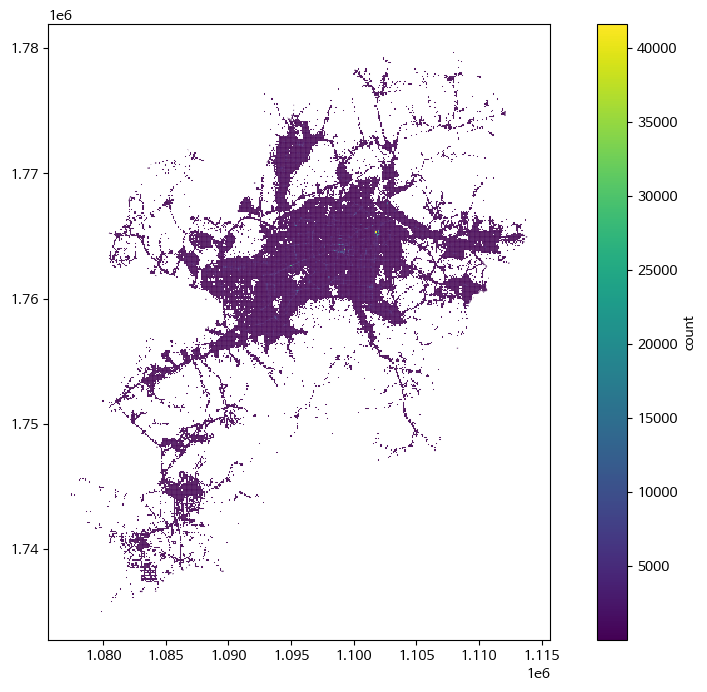

In [ ]:
# 시각화
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
taxi_end.plot(ax=ax, legend=True, legend_kwds={'label': "count"}, column='count', linewidth=0.05, edgecolor='0.8')

plt.show()

In [ ]:
# GeoJSON 파일 열기
daegu = gpd.read_file('./data/hangjeongdong_대구광역시.geojson')

# 데이터프레임 확인
display(daegu.head())

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,geometry
0,625,대구광역시 중구 삼덕동,2201054,2711054500,27110,27,대구광역시,중구,"MULTIPOLYGON (((128.59981 35.86827, 128.60252 ..."
1,626,대구광역시 중구 성내1동,2201056,2711056500,27110,27,대구광역시,중구,"MULTIPOLYGON (((128.60136 35.87480, 128.59981 ..."
2,627,대구광역시 중구 성내2동,2201059,2711057500,27110,27,대구광역시,중구,"MULTIPOLYGON (((128.59495 35.87530, 128.59407 ..."
3,628,대구광역시 중구 성내3동,2201061,2711058500,27110,27,대구광역시,중구,"MULTIPOLYGON (((128.58017 35.87908, 128.58838 ..."
4,629,대구광역시 중구 대신동,2201062,2711059500,27110,27,대구광역시,중구,"MULTIPOLYGON (((128.58261 35.87059, 128.58235 ..."


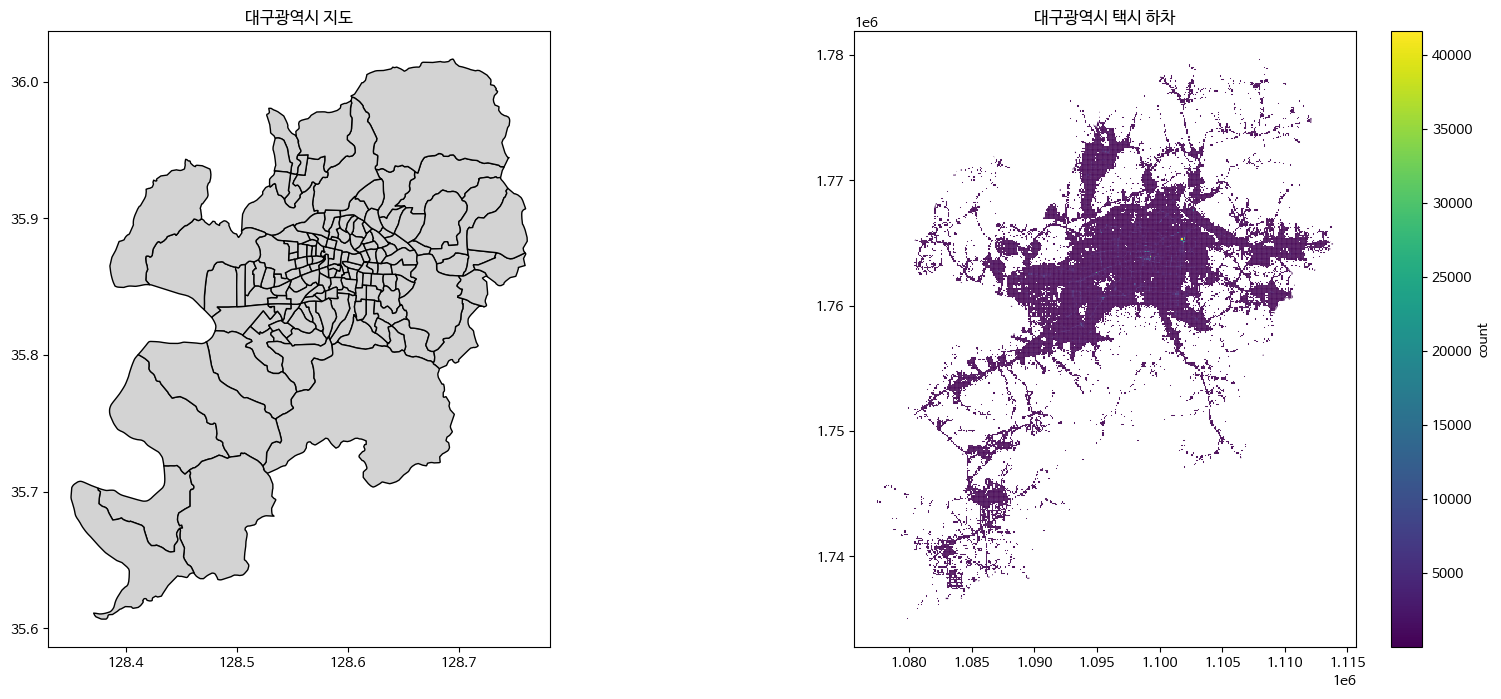

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20, 8))
daegu.plot(ax=ax[0], color='lightgray',edgecolor='black')
taxi_end.plot(ax=ax[1], legend=True, legend_kwds={'label': "count"}, column='count', linewidth=0.05, edgecolor='0.8')

ax[0].set_title('대구광역시 지도')
ax[1].set_title('대구광역시 택시 하차')

plt.show()

비슷한 분포를 띄고 있음을 확인할 수 있음

### 좌표계 변환

In [ ]:
print("Daegy Bounds:", daegu.total_bounds)
print("gdf_100 Bounds:", taxi_end.total_bounds)

Daegy Bounds: [128.35037289  35.60676579 128.76193784  36.01644624]
gdf_100 Bounds: [1077032.5416     1734852.72183504 1113966.38429075 1780587.41117014]


In [ ]:
daegu.crs, taxi_end.crs # EPSG:4326, EPSG:5179

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Projected CRS: EPSG:5179>
 Name: KGD2002 / Unified CS
 Axis Info [cartesian]:
 - X[north]: Northing (metre)
 - Y[east]: Easting (metre)
 Area of Use:
 - name: Republic of Korea (South Korea) - onshore and offshore.
 - bounds: (122.71, 28.6, 134.28, 40.27)
 Coordinate Operation:
 - name: Korea Unified Belt
 - method: Transverse Mercator
 Datum: Korean Geodetic Datum 2002
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich)

In [ ]:
taxi_end = taxi_end.to_crs("EPSG:4326")

dague_total_bounds = daegu.total_bounds
taxi_total_bounds = taxi_end.total_bounds

taxi_end['geometry'] = taxi_end['geometry'].translate(
    xoff=dague_total_bounds[0] - taxi_total_bounds[0],
    yoff=dague_total_bounds[1] - taxi_total_bounds[1]
)

print("Daegy Bounds:", daegu.total_bounds)
print("gdf_100 Bounds:", taxi_end.total_bounds)

Daegy Bounds: [128.35037289  35.60676579 128.76193784  36.01644624]
gdf_100 Bounds: [128.35037289  35.60676579 128.76158985  36.016391  ]


In [ ]:
display(taxi_end.head())

,id,count,MONTH_count_2020_1,MONTH_count_2020_2,MONTH_count_2020_3,MONTH_count_2020_4,HOUR_count_0,HOUR_count_1,HOUR_count_2,HOUR_count_3,HOUR_count_4,HOUR_count_5,HOUR_count_6,HOUR_count_7,HOUR_count_8,HOUR_count_9,HOUR_count_10,HOUR_count_11,HOUR_count_12,HOUR_count_13,HOUR_count_14,HOUR_count_15,HOUR_count_16,HOUR_count_17,HOUR_count_18,HOUR_count_19,HOUR_count_20,HOUR_count_21,HOUR_count_22,HOUR_count_23,geometry
0,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((128.35120 35.70472, 128.35154 ..."
1,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((128.35069 35.70424, 128.35115 ..."
2,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((128.35063 35.70333, 128.35066 ..."
3,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((128.35060 35.70287, 128.35151 ..."
4,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((128.35052 35.70180, 128.35053 ..."


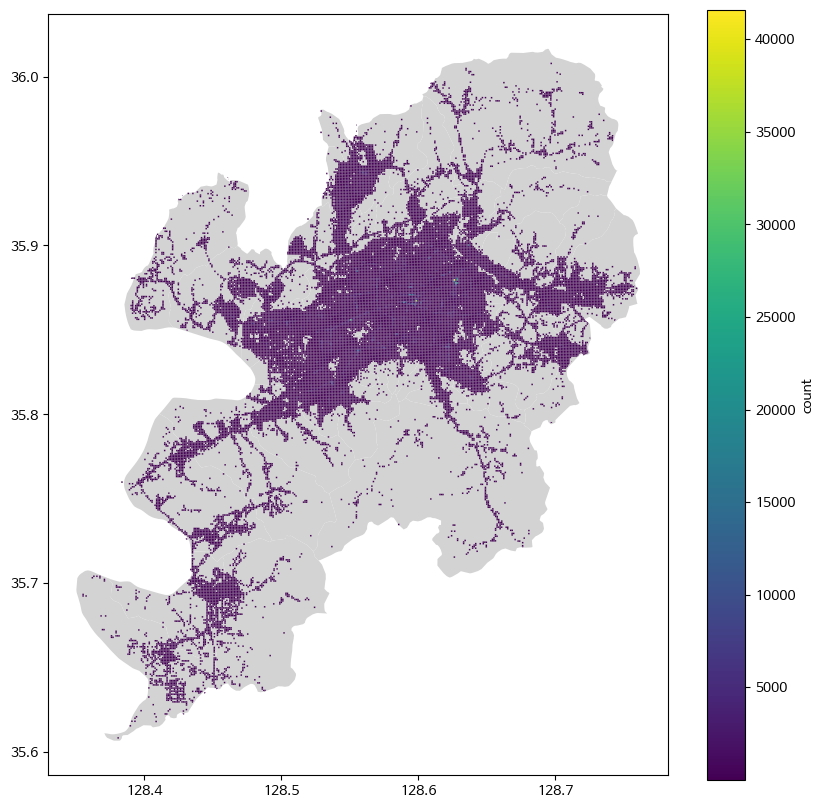

In [ ]:
# Daegu 지도를 그립니다.
fig, ax = plt.subplots(figsize=(10, 10))
daegu.plot(ax=ax, color='lightgray')

# gdf의 'count' 데이터를 점으로 표시합니다.
taxi_end.plot(ax=ax,legend=True, legend_kwds={'label': "count"}, column='count', linewidth=0.05, edgecolor='0.8')

plt.show()

### 공간 정보 추가

In [ ]:
# sjoin을 사용하여 공간 조인 수행
merge_taxi_end = gpd.sjoin(taxi_end, daegu, how='left', op='within')

# 결과 확인
display(merge_taxi_end.head())

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,id,count,MONTH_count_2020_1,MONTH_count_2020_2,MONTH_count_2020_3,MONTH_count_2020_4,HOUR_count_0,HOUR_count_1,HOUR_count_2,HOUR_count_3,HOUR_count_4,HOUR_count_5,HOUR_count_6,HOUR_count_7,HOUR_count_8,HOUR_count_9,HOUR_count_10,HOUR_count_11,HOUR_count_12,HOUR_count_13,HOUR_count_14,HOUR_count_15,HOUR_count_16,HOUR_count_17,HOUR_count_18,HOUR_count_19,HOUR_count_20,HOUR_count_21,HOUR_count_22,HOUR_count_23,geometry,index_right,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm
0,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((128.35120 35.70472, 128.35154 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((128.35069 35.70424, 128.35115 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((128.35063 35.70333, 128.35066 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((128.35060 35.70287, 128.35151 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((128.35052 35.70180, 128.35053 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merge_taxi_end.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 89316 entries, 0 to 89315
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  89316 non-null  int64   
 1   count               24861 non-null  float64 
 2   MONTH_count_2020_1  21189 non-null  float64 
 3   MONTH_count_2020_2  20461 non-null  float64 
 4   MONTH_count_2020_3  19462 non-null  float64 
 5   MONTH_count_2020_4  19331 non-null  float64 
 6   HOUR_count_0        15003 non-null  float64 
 7   HOUR_count_1        14342 non-null  float64 
 8   HOUR_count_2        13733 non-null  float64 
 9   HOUR_count_3        13167 non-null  float64 
 10  HOUR_count_4        12734 non-null  float64 
 11  HOUR_count_5        12171 non-null  float64 
 12  HOUR_count_6        12042 non-null  float64 
 13  HOUR_count_7        13247 non-null  float64 
 14  HOUR_count_8        14491 non-null  float64 
 15  HOUR_count_9        14365 no

### 택시 승차

In [ ]:
taxi_start.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   89316 non-null  int64   
 1   count                22244 non-null  float64 
 2   MONTH_count_2020_1   19044 non-null  float64 
 3   MONTH_count_2020_2   18415 non-null  float64 
 4   MONTH_count_2020_3   17604 non-null  float64 
 5   MONTH_count_2020_4   17443 non-null  float64 
 6   MONTH_count_2019_12  736 non-null    float64 
 7   HOUR_count_0         12675 non-null  float64 
 8   HOUR_count_1         11760 non-null  float64 
 9   HOUR_count_2         10967 non-null  float64 
 10  HOUR_count_3         10076 non-null  float64 
 11  HOUR_count_4         9815 non-null   float64 
 12  HOUR_count_5         10065 non-null  float64 
 13  HOUR_count_6         10241 non-null  float64 
 14  HOUR_count_7         11591 non-null  float64 
 15  HOUR_count_

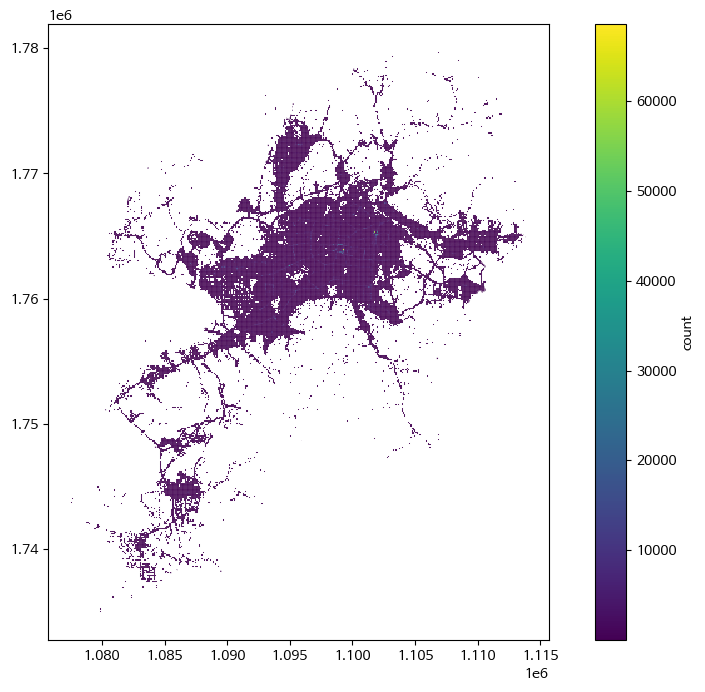

In [ ]:
# 시각화
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
taxi_start.plot(ax=ax, legend=True, legend_kwds={'label': "count"}, column='count', linewidth=0.05, edgecolor='0.8')

plt.show()

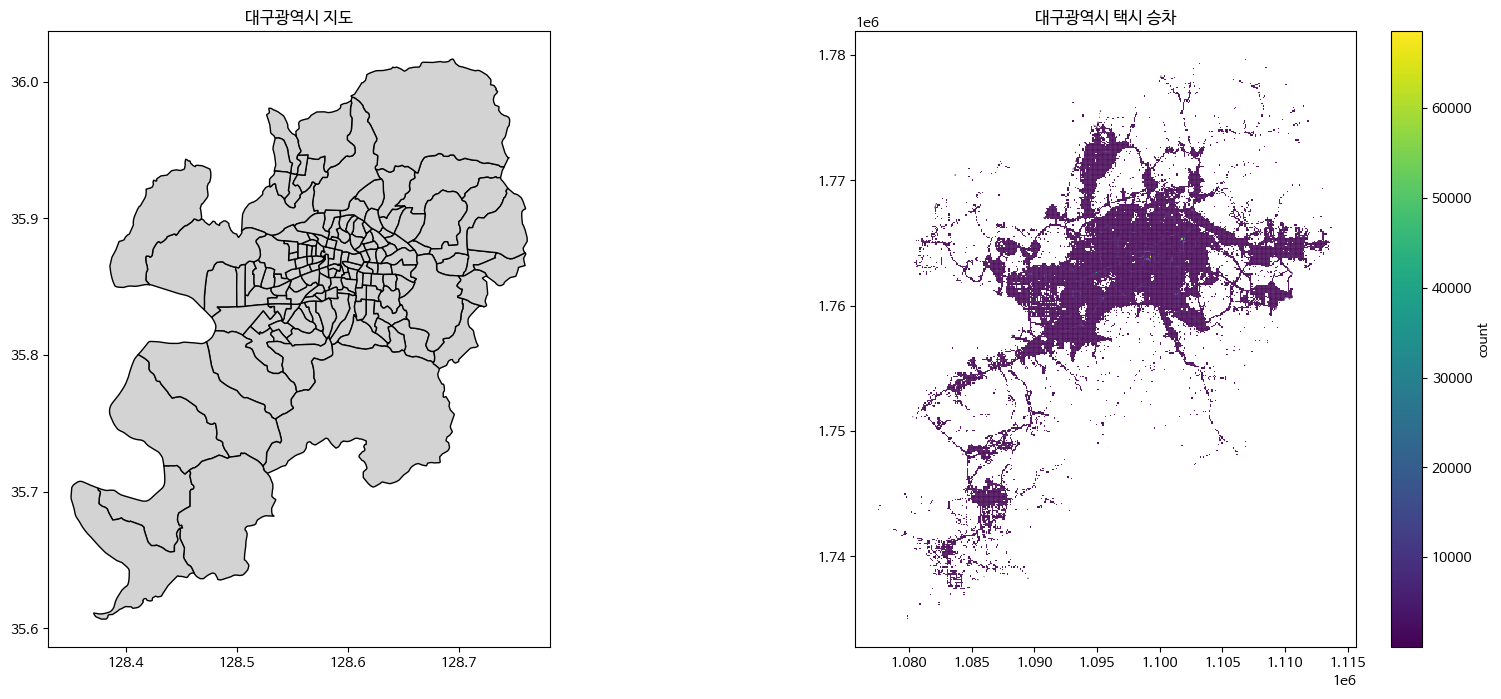

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20, 8))
daegu.plot(ax=ax[0], color='lightgray',edgecolor='black')
taxi_start.plot(ax=ax[1], legend=True, legend_kwds={'label': "count"}, column='count', linewidth=0.05, edgecolor='0.8')

ax[0].set_title('대구광역시 지도')
ax[1].set_title('대구광역시 택시 승차')

plt.show()

비슷한 분포를 띄고 있음을 확인할 수 있음

### 좌표계 변환

In [ ]:
print("Daegy Bounds:", daegu.total_bounds)
print("gdf_100 Bounds:", taxi_start.total_bounds)

Daegy Bounds: [128.35037289  35.60676579 128.76193784  36.01644624]
gdf_100 Bounds: [1077032.5416     1734852.72183504 1113966.38429075 1780587.41117014]


In [ ]:
daegu.crs, taxi_start.crs # EPSG:4326, EPSG:5179

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Projected CRS: EPSG:5179>
 Name: KGD2002 / Unified CS
 Axis Info [cartesian]:
 - X[north]: Northing (metre)
 - Y[east]: Easting (metre)
 Area of Use:
 - name: Republic of Korea (South Korea) - onshore and offshore.
 - bounds: (122.71, 28.6, 134.28, 40.27)
 Coordinate Operation:
 - name: Korea Unified Belt
 - method: Transverse Mercator
 Datum: Korean Geodetic Datum 2002
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich)

In [ ]:
taxi_start = taxi_start.to_crs("EPSG:4326")

dague_total_bounds = daegu.total_bounds
taxi_total_bounds = taxi_start.total_bounds

taxi_start['geometry'] = taxi_start['geometry'].translate(
    xoff=dague_total_bounds[0] - taxi_total_bounds[0],
    yoff=dague_total_bounds[1] - taxi_total_bounds[1]
)

print("Daegy Bounds:", daegu.total_bounds)
print("gdf_100 Bounds:", taxi_end.total_bounds)

Daegy Bounds: [128.35037289  35.60676579 128.76193784  36.01644624]
gdf_100 Bounds: [128.35037289  35.60676579 128.76158985  36.016391  ]


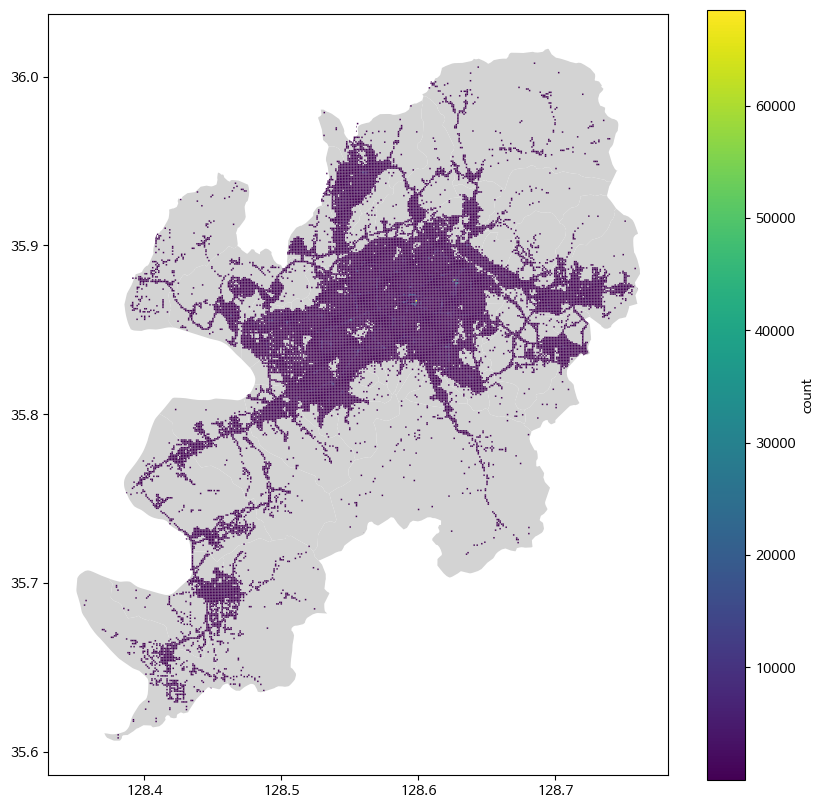

In [ ]:
# Daegu 지도를 그립니다.
fig, ax = plt.subplots(figsize=(10, 10))
daegu.plot(ax=ax, color='lightgray')

# gdf의 'count' 데이터를 점으로 표시합니다.
taxi_start.plot(ax=ax,legend=True, legend_kwds={'label': "count"}, column='count', linewidth=0.05, edgecolor='0.8')

plt.show()

### 공간 정보 추가

In [ ]:
# sjoin을 사용하여 공간 조인 수행
merge_taxi_start = gpd.sjoin(taxi_start, daegu, how='left', op='within')

# 결과 확인
display(merge_taxi_start.head())

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,id,count,MONTH_count_2020_1,MONTH_count_2020_2,MONTH_count_2020_3,MONTH_count_2020_4,MONTH_count_2019_12,HOUR_count_0,HOUR_count_1,HOUR_count_2,HOUR_count_3,HOUR_count_4,HOUR_count_5,HOUR_count_6,HOUR_count_7,HOUR_count_8,HOUR_count_9,HOUR_count_10,HOUR_count_11,HOUR_count_12,HOUR_count_13,HOUR_count_14,HOUR_count_15,HOUR_count_16,HOUR_count_17,HOUR_count_18,HOUR_count_19,HOUR_count_20,HOUR_count_21,HOUR_count_22,HOUR_count_23,geometry,index_right,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm
0,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((128.35120 35.70472, 128.35154 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((128.35069 35.70424, 128.35115 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((128.35063 35.70333, 128.35066 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((128.35060 35.70287, 128.35151 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((128.35052 35.70180, 128.35053 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merge_taxi_start.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 89316 entries, 0 to 89315
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   89316 non-null  int64   
 1   count                22244 non-null  float64 
 2   MONTH_count_2020_1   19044 non-null  float64 
 3   MONTH_count_2020_2   18415 non-null  float64 
 4   MONTH_count_2020_3   17604 non-null  float64 
 5   MONTH_count_2020_4   17443 non-null  float64 
 6   MONTH_count_2019_12  736 non-null    float64 
 7   HOUR_count_0         12675 non-null  float64 
 8   HOUR_count_1         11760 non-null  float64 
 9   HOUR_count_2         10967 non-null  float64 
 10  HOUR_count_3         10076 non-null  float64 
 11  HOUR_count_4         9815 non-null   float64 
 12  HOUR_count_5         10065 non-null  float64 
 13  HOUR_count_6         10241 non-null  float64 
 14  HOUR_count_7         11591 non-null  float64 
 15  HOUR_count_

### 동별 승하차 count

In [ ]:
merge_taxi_end.columns, merge_taxi_start.columns

(Index(['id', 'count', 'MONTH_count_2020_1', 'MONTH_count_2020_2',
        'MONTH_count_2020_3', 'MONTH_count_2020_4', 'HOUR_count_0',
        'HOUR_count_1', 'HOUR_count_2', 'HOUR_count_3', 'HOUR_count_4',
        'HOUR_count_5', 'HOUR_count_6', 'HOUR_count_7', 'HOUR_count_8',
        'HOUR_count_9', 'HOUR_count_10', 'HOUR_count_11', 'HOUR_count_12',
        'HOUR_count_13', 'HOUR_count_14', 'HOUR_count_15', 'HOUR_count_16',
        'HOUR_count_17', 'HOUR_count_18', 'HOUR_count_19', 'HOUR_count_20',
        'HOUR_count_21', 'HOUR_count_22', 'HOUR_count_23', 'geometry',
        'index_right', 'OBJECTID', 'adm_nm', 'adm_cd', 'adm_cd2', 'sgg', 'sido',
        'sidonm', 'sggnm'],
       dtype='object'),
 Index(['id', 'count', 'MONTH_count_2020_1', 'MONTH_count_2020_2',
        'MONTH_count_2020_3', 'MONTH_count_2020_4', 'MONTH_count_2019_12',
        'HOUR_count_0', 'HOUR_count_1', 'HOUR_count_2', 'HOUR_count_3',
        'HOUR_count_4', 'HOUR_count_5', 'HOUR_count_6', 'HOUR_count_7',
    

In [ ]:
taxi_end2 = merge_taxi_end[['count', 'MONTH_count_2020_1', 'MONTH_count_2020_2',
       'MONTH_count_2020_3', 'MONTH_count_2020_4', 'HOUR_count_0',
       'HOUR_count_1', 'HOUR_count_2', 'HOUR_count_3', 'HOUR_count_4',
       'HOUR_count_5', 'HOUR_count_6', 'HOUR_count_7', 'HOUR_count_8',
       'HOUR_count_9', 'HOUR_count_10', 'HOUR_count_11', 'HOUR_count_12',
       'HOUR_count_13', 'HOUR_count_14', 'HOUR_count_15', 'HOUR_count_16',
       'HOUR_count_17', 'HOUR_count_18', 'HOUR_count_19', 'HOUR_count_20',
       'HOUR_count_21', 'HOUR_count_22', 'HOUR_count_23','adm_nm']]
taxi_start2 = merge_taxi_start[['count', 'MONTH_count_2020_1', 'MONTH_count_2020_2',
        'MONTH_count_2020_3', 'MONTH_count_2020_4', 'MONTH_count_2019_12',
        'HOUR_count_0', 'HOUR_count_1', 'HOUR_count_2', 'HOUR_count_3',
        'HOUR_count_4', 'HOUR_count_5', 'HOUR_count_6', 'HOUR_count_7',
        'HOUR_count_8', 'HOUR_count_9', 'HOUR_count_10', 'HOUR_count_11',
        'HOUR_count_12', 'HOUR_count_13', 'HOUR_count_14', 'HOUR_count_15',
        'HOUR_count_16', 'HOUR_count_17', 'HOUR_count_18', 'HOUR_count_19',
        'HOUR_count_20', 'HOUR_count_21', 'HOUR_count_22', 'HOUR_count_23','adm_nm']]

In [ ]:
grouped_end = taxi_end2.groupby('adm_nm').sum()
display(grouped_end)

grouped_start = taxi_start2.groupby('adm_nm').sum()
display(grouped_start)

,count,MONTH_count_2020_1,MONTH_count_2020_2,MONTH_count_2020_3,MONTH_count_2020_4,HOUR_count_0,HOUR_count_1,HOUR_count_2,HOUR_count_3,HOUR_count_4,HOUR_count_5,HOUR_count_6,HOUR_count_7,HOUR_count_8,HOUR_count_9,HOUR_count_10,HOUR_count_11,HOUR_count_12,HOUR_count_13,HOUR_count_14,HOUR_count_15,HOUR_count_16,HOUR_count_17,HOUR_count_18,HOUR_count_19,HOUR_count_20,HOUR_count_21,HOUR_count_22,HOUR_count_23
adm_nm,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
대구광역시 남구 대명10동,17507.0,6246.0,4616.0,3527.0,3118.0,1318.0,1061.0,936.0,684.0,519.0,336.0,212.0,270.0,531.0,515.0,523.0,578.0,387.0,474.0,482.0,620.0,575.0,654.0,913.0,1054.0,1076.0,1216.0,1180.0,1393.0
대구광역시 남구 대명11동,10176.0,3424.0,2580.0,2161.0,2011.0,784.0,643.0,541.0,402.0,261.0,152.0,130.0,148.0,224.0,197.0,286.0,235.0,268.0,296.0,280.0,359.0,331.0,452.0,530.0,574.0,594.0,784.0,809.0,896.0
대구광역시 남구 대명1동,15350.0,5097.0,4049.0,3304.0,2900.0,1373.0,1121.0,965.0,704.0,537.0,294.0,196.0,193.0,298.0,325.0,303.0,321.0,360.0,333.0,401.0,397.0,498.0,572.0,695.0,875.0,940.0,1093.0,1182.0,1374.0
대구광역시 남구 대명2동,24505.0,8334.0,6567.0,5009.0,4595.0,1819.0,1561.0,1375.0,1013.0,773.0,546.0,325.0,381.0,1003.0,1072.0,884.0,757.0,669.0,816.0,809.0,873.0,860.0,929.0,1151.0,1149.0,1165.0,1354.0,1483.0,1738.0
대구광역시 남구 대명3동,34008.0,11934.0,8759.0,6962.0,6353.0,2220.0,2016.0,1661.0,1247.0,871.0,591.0,346.0,474.0,1001.0,1072.0,909.0,855.0,869.0,975.0,1015.0,1080.0,1205.0,1468.0,2032.0,2192.0,2461.0,2265.0,2508.0,2675.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
대구광역시 중구 동인동,39899.0,14087.0,10672.0,8081.0,7059.0,2001.0,1684.0,1365.0,1026.0,734.0,630.0,490.0,942.0,3111.0,1894.0,1386.0,1335.0,1271.0,1348.0,1462.0,1379.0,1405.0,1778.0,2337.0,2431.0,2656.0,2414.0,2347.0,2473.0
대구광역시 중구 삼덕동,86933.0,33189.0,23041.0,15410.0,15293.0,6627.0,5216.0,3890.0,2653.0,1876.0,1122.0,976.0,1650.0,2137.0,2224.0,2335.0,2035.0,1998.0,2017.0,2391.0,2273.0,2553.0,3143.0,4190.0,5811.0,6860.0,7403.0,7643.0,7910.0
대구광역시 중구 성내1동,77307.0,28000.0,21040.0,14447.0,13820.0,2764.0,2021.0,1588.0,1077.0,873.0,821.0,844.0,1095.0,2490.0,4922.0,5173.0,4481.0,4130.0,4115.0,4167.0,3936.0,3798.0,4012.0,4930.0,4884.0,4474.0,3956.0,3506.0,3250.0


,count,MONTH_count_2020_1,MONTH_count_2020_2,MONTH_count_2020_3,MONTH_count_2020_4,MONTH_count_2019_12,HOUR_count_0,HOUR_count_1,HOUR_count_2,HOUR_count_3,HOUR_count_4,HOUR_count_5,HOUR_count_6,HOUR_count_7,HOUR_count_8,HOUR_count_9,HOUR_count_10,HOUR_count_11,HOUR_count_12,HOUR_count_13,HOUR_count_14,HOUR_count_15,HOUR_count_16,HOUR_count_17,HOUR_count_18,HOUR_count_19,HOUR_count_20,HOUR_count_21,HOUR_count_22,HOUR_count_23
adm_nm,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
대구광역시 남구 대명10동,21348.0,7385.0,5663.0,4496.0,3803.0,1.0,1161.0,968.0,810.0,573.0,391.0,386.0,401.0,469.0,948.0,878.0,791.0,675.0,649.0,746.0,756.0,796.0,747.0,906.0,1135.0,1331.0,1414.0,1439.0,1500.0,1478.0
대구광역시 남구 대명11동,7688.0,2374.0,1950.0,1763.0,1601.0,0.0,279.0,155.0,117.0,68.0,71.0,127.0,196.0,267.0,438.0,542.0,289.0,250.0,291.0,324.0,381.0,306.0,308.0,401.0,470.0,570.0,491.0,519.0,432.0,396.0
대구광역시 남구 대명1동,16487.0,5064.0,4368.0,3796.0,3259.0,0.0,679.0,561.0,446.0,283.0,253.0,263.0,334.0,504.0,807.0,1323.0,804.0,638.0,588.0,663.0,689.0,684.0,646.0,786.0,887.0,982.0,1054.0,916.0,867.0,830.0
대구광역시 남구 대명2동,24834.0,8041.0,6846.0,5221.0,4724.0,2.0,1317.0,764.0,521.0,365.0,364.0,274.0,440.0,512.0,1258.0,1416.0,1012.0,830.0,847.0,1003.0,1070.0,1021.0,1062.0,1413.0,1943.0,1668.0,1519.0,1456.0,1381.0,1378.0
대구광역시 남구 대명3동,34713.0,11750.0,8898.0,7271.0,6786.0,8.0,2193.0,1763.0,1396.0,879.0,674.0,589.0,565.0,727.0,1285.0,1271.0,1184.0,1002.0,1040.0,1190.0,1234.0,1372.0,1308.0,1549.0,1976.0,2083.0,2318.0,2233.0,2443.0,2439.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
대구광역시 중구 동인동,46049.0,16727.0,12528.0,8935.0,7837.0,22.0,2424.0,1820.0,1408.0,965.0,836.0,625.0,789.0,1013.0,1851.0,2028.0,2021.0,1657.0,1655.0,1663.0,1679.0,1700.0,1808.0,2190.0,2851.0,2649.0,2790.0,2909.0,2994.0,3724.0
대구광역시 중구 삼덕동,146668.0,59252.0,42415.0,21116.0,23868.0,17.0,15599.0,17080.0,16832.0,14647.0,12029.0,6995.0,4143.0,2581.0,2595.0,2544.0,1931.0,1567.0,1535.0,1614.0,1574.0,1767.0,2092.0,2551.0,2856.0,3589.0,4467.0,5927.0,9063.0,11090.0
대구광역시 중구 성내1동,102771.0,44519.0,28816.0,14821.0,14602.0,13.0,8467.0,7401.0,5998.0,4053.0,3298.0,1868.0,1037.0,899.0,1815.0,2107.0,2008.0,1859.0,2283.0,2613.0,2770.0,3301.0,3752.0,4737.0,5712.0,6281.0,7197.0,6982.0,7956.0,8377.0


In [ ]:
merge_df = grouped_end.merge(grouped_start, on='adm_nm',suffixes=('_end','_start'))
display(merge_df.head())

,count_end,MONTH_count_2020_1_end,MONTH_count_2020_2_end,MONTH_count_2020_3_end,MONTH_count_2020_4_end,HOUR_count_0_end,HOUR_count_1_end,HOUR_count_2_end,HOUR_count_3_end,HOUR_count_4_end,HOUR_count_5_end,HOUR_count_6_end,HOUR_count_7_end,HOUR_count_8_end,HOUR_count_9_end,HOUR_count_10_end,HOUR_count_11_end,HOUR_count_12_end,HOUR_count_13_end,HOUR_count_14_end,HOUR_count_15_end,HOUR_count_16_end,HOUR_count_17_end,HOUR_count_18_end,HOUR_count_19_end,HOUR_count_20_end,HOUR_count_21_end,HOUR_count_22_end,HOUR_count_23_end,count_start,MONTH_count_2020_1_start,MONTH_count_2020_2_start,MONTH_count_2020_3_start,MONTH_count_2020_4_start,MONTH_count_2019_12,HOUR_count_0_start,HOUR_count_1_start,HOUR_count_2_start,HOUR_count_3_start,HOUR_count_4_start,HOUR_count_5_start,HOUR_count_6_start,HOUR_count_7_start,HOUR_count_8_start,HOUR_count_9_start,HOUR_count_10_start,HOUR_count_11_start,HOUR_count_12_start,HOUR_count_13_start,HOUR_count_14_start,HOUR_count_15_start,HOUR_count_16_start,HOUR_count_17_start,HOUR_count_18_start,HOUR_count_19_start,HOUR_count_20_start,HOUR_count_21_start,HOUR_count_22_start,HOUR_count_23_start
adm_nm,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
대구광역시 남구 대명10동,17507.0,6246.0,4616.0,3527.0,3118.0,1318.0,1061.0,936.0,684.0,519.0,336.0,212.0,270.0,531.0,515.0,523.0,578.0,387.0,474.0,482.0,620.0,575.0,654.0,913.0,1054.0,1076.0,1216.0,1180.0,1393.0,21348.0,7385.0,5663.0,4496.0,3803.0,1.0,1161.0,968.0,810.0,573.0,391.0,386.0,401.0,469.0,948.0,878.0,791.0,675.0,649.0,746.0,756.0,796.0,747.0,906.0,1135.0,1331.0,1414.0,1439.0,1500.0,1478.0
대구광역시 남구 대명11동,10176.0,3424.0,2580.0,2161.0,2011.0,784.0,643.0,541.0,402.0,261.0,152.0,130.0,148.0,224.0,197.0,286.0,235.0,268.0,296.0,280.0,359.0,331.0,452.0,530.0,574.0,594.0,784.0,809.0,896.0,7688.0,2374.0,1950.0,1763.0,1601.0,0.0,279.0,155.0,117.0,68.0,71.0,127.0,196.0,267.0,438.0,542.0,289.0,250.0,291.0,324.0,381.0,306.0,308.0,401.0,470.0,570.0,491.0,519.0,432.0,396.0
대구광역시 남구 대명1동,15350.0,5097.0,4049.0,3304.0,2900.0,1373.0,1121.0,965.0,704.0,537.0,294.0,196.0,193.0,298.0,325.0,303.0,321.0,360.0,333.0,401.0,397.0,498.0,572.0,695.0,875.0,940.0,1093.0,1182.0,1374.0,16487.0,5064.0,4368.0,3796.0,3259.0,0.0,679.0,561.0,446.0,283.0,253.0,263.0,334.0,504.0,807.0,1323.0,804.0,638.0,588.0,663.0,689.0,684.0,646.0,786.0,887.0,982.0,1054.0,916.0,867.0,830.0
대구광역시 남구 대명2동,24505.0,8334.0,6567.0,5009.0,4595.0,1819.0,1561.0,1375.0,1013.0,773.0,546.0,325.0,381.0,1003.0,1072.0,884.0,757.0,669.0,816.0,809.0,873.0,860.0,929.0,1151.0,1149.0,1165.0,1354.0,1483.0,1738.0,24834.0,8041.0,6846.0,5221.0,4724.0,2.0,1317.0,764.0,521.0,365.0,364.0,274.0,440.0,512.0,1258.0,1416.0,1012.0,830.0,847.0,1003.0,1070.0,1021.0,1062.0,1413.0,1943.0,1668.0,1519.0,1456.0,1381.0,1378.0
대구광역시 남구 대명3동,34008.0,11934.0,8759.0,6962.0,6353.0,2220.0,2016.0,1661.0,1247.0,871.0,591.0,346.0,474.0,1001.0,1072.0,909.0,855.0,869.0,975.0,1015.0,1080.0,1205.0,1468.0,2032.0,2192.0,2461.0,2265.0,2508.0,2675.0,34713.0,11750.0,8898.0,7271.0,6786.0,8.0,2193.0,1763.0,1396.0,879.0,674.0,589.0,565.0,727.0,1285.0,1271.0,1184.0,1002.0,1040.0,1190.0,1234.0,1372.0,1308.0,1549.0,1976.0,2083.0,2318.0,2233.0,2443.0,2439.0


In [ ]:
merge_df.to_csv('동별_택시승하차_count.csv')